- 선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일. 이때 선형 회귀의 가설(직선의 방정식)은 아래와 같은 형식을 가짐  
$ y = Wx + b $
- 가설의 H를 따서 y대신 다음과 같이 식을 표현하기도 함  
$ H(x) = Wx + b $  
- 이때 x와 곱해지는 W를 가중치(Weight)라고 하며, b를 편향(bias)이라고 함
    - W와 b는 직선의 방정식에서 기울기와 y 절편에 해당됨

- 비용 함수(Cost function)  
비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)  

- 예측값들과 실제값들과의 총 오차(total error)는 어떻게 구할까?  
수식적으로 단순히 '오차 = 실제값 - 예측값'으로 정의하면 오차값이 음수가 나오는 경우가 생김  
그래서 오차를 그냥 전부 더하는 것이 아니라, 각 오차들을 제곱해준 뒤에 전부 더함  

- 평균 제곱 오차 (Mean Squared Error, MSE)  
오차의 제곱합에 대해 데이터의 개수인 n으로 나눈 평균값  

- 옵티마이저 - 경사 하강법(Gradient Descent)  
비용 함수(Cost Function)의 값을 최소로 하는 W와 b를 찾을 때 사용되는 것이 옵티마이저(Optimizer), 최적화 알고리즘  
이 옵티마이저 알고리즘을 통해 적절한 W와 b를 찾아내는 과정을 머신 러닝에서 학습(training)이라고 부름

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [3]:
# 변수 선언
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [4]:
# 가중치와 편향의 초기화
# 선형 회귀의 목표는 가장 잘 맞는 직선을 정의하는 W 와 b의 값을 찾는 것

# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True)
print(W)

# 편향 b도 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
b = torch.zeros(1, requires_grad=True)
print(b)

# 현재 가중치 W와 편향 b 둘다 0 이므로 방정식은 y = 0xW + b

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [5]:
# 가설 세우기
hypothesis = x_train * W + b
print(hypothesis)

# 비용함수 선언 (MSE)
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)
tensor(18.6667, grad_fn=<MeanBackward0>)


In [6]:
# 경사 하강법 구현. SGD는 경사 하강법의 일종.
optimizer = optim.SGD([W, b], lr=0.01)

# optimizer.zero_grad()를 실행하므로서 미분을 통해 얻은 기울기를 0으로 초기화 함.
# 기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있음.
# cost.backward() 함수를 호출하면 가중치 W와 편향 b에 대한 기울기가 계산됨.
# 그 다음 경사 하강법 최적화 함수 opimizer의 step() 함수를 호출하여 인수로 들어갔던 
# W와 b에서 리턴되는 변수들의 기울기에 학습률(learining rate) 0.01을 곱하여 빼줌으로서 업데이트함

# gradient를 0으로 초기화
optimizer.zero_grad()
# 비용 함수를 미분하여 gradient 계산
cost.backward()
# W와 b를 업데이트
optimizer.step()

In [7]:
# 전체 코드
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

In [8]:
# optimizer.zero_grad()가 필요한 이유
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    z = 2 * w
    z.backward()
    # 계속해서 미분값인 2가 누적되기 때문에 0으로 초기화시켜줘야 함
    print('w 미분 값 :', w.grad)

w 미분 값 : tensor(2.)
w 미분 값 : tensor(4.)
w 미분 값 : tensor(6.)
w 미분 값 : tensor(8.)
w 미분 값 : tensor(10.)
w 미분 값 : tensor(12.)
w 미분 값 : tensor(14.)
w 미분 값 : tensor(16.)
w 미분 값 : tensor(18.)
w 미분 값 : tensor(20.)
w 미분 값 : tensor(22.)
w 미분 값 : tensor(24.)
w 미분 값 : tensor(26.)
w 미분 값 : tensor(28.)
w 미분 값 : tensor(30.)
w 미분 값 : tensor(32.)
w 미분 값 : tensor(34.)
w 미분 값 : tensor(36.)
w 미분 값 : tensor(38.)
w 미분 값 : tensor(40.)
w 미분 값 : tensor(42.)


In [9]:
# 자동 미분
# requires_grad=True는 이 텐서에 대한 기울기 저장.
w = torch.tensor(2.0, requires_grad=True)

y = w**2
z = 2*y + 5

z.backward() # w에 대한 기울기를 계산
print('수식을 w로 미분한 값:', w.grad)

수식을 w로 미분한 값: tensor(8.)


다중 선형 회귀  
$ H(x) = w_1x_1 + w_2x_2 + w_3x_3 + b $ 

In [10]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs+1):
    # H(x) 
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    # cost 
    cost = torch.mean((hypothesis - y_train) ** 2)
    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()))
    

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


- 백터 내적  
행렬의 곱셈 과정에서 이루어지는 벡터 연산  
$ H(X) = w_1x_1 + w_2x_2 + w_3x_3 $ 는 아래와 같이 벡터의 내적으로 표현함  
$ \begin{pmatrix} x_1 & x_2 & x_3 \end{pmatrix} \cdot \begin{pmatrix} w_1 \\ w_2 \\ w_3 \end{pmatrix} = (x_1w_1 + x_2w_2 + x_3w_3) $  
H(X) = XW

- 5개의 데이터, feature가 3일 때 독립 변수 x 개수 = (5 x 3) = 15  
$ 
\begin{pmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{23} \\ x_{31} & x_{32} & x_{33} \\ x_{41} & x_{42} & x_{43} \\ x_{51} & x_{52} & x_{53}\end{pmatrix}
\cdot
\begin{pmatrix} w_1 \\ w_2 \\ w_3 \end{pmatrix} + \begin{pmatrix} b \\ b \\ b \\ b \\ b \end{pmatrix}
=
\begin{pmatrix} x_{11}w_1 + x_{12}w_2 + x_{13}w_3 + b \\ x_{21}w_1 + x_{22}w_2 + x_{23}w_3 + b \\ x_{31}w_1 + x_{32}w_2 + x_{33}w_3 + b \\ x_{41}w_1 + x_{42}w_2 + x_{43}w_3 + b \\ x_{51}w_1 + x_{52}w_2 + x_{53}w_3 + b\end{pmatrix} $  
H(X) = XW + B

In [11]:
x_train  =  torch.FloatTensor([[73, 80, 75], 
                               [93, 88, 93], 
                               [89, 91, 80], 
                               [96, 98, 100],   
                               [73, 66, 70]])  
y_train  =  torch.FloatTensor([[152], [185], [180], [196], [142]])
print(x_train.shape) # (5, 3)
print(y_train.shape) # (5, 1)

# 가중치와 편향 선언 (3, 1)
# 행렬의 곱셈이 성립되려면 곱셈의 좌측에 있는 행렬의 열의 크기(5, 3)와 
# 우측에 있는 행렬의 행의 크기가 일치해야 함
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    # H(x) 계산. b는 브로드 캐스팅되어 각 샘플에 더해짐
    hypothesis = x_train.matmul(W) + b
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    # cost로 H(x) 갱신
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()))

torch.Size([5, 3])
torch.Size([5, 1])
Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7861,  95.8280]) Cost: 3069.590820
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481964
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9731, 169.8976, 192.0301, 136.5279]) Cost: 38.687401
Epoch    7/20 hypothesis: tensor([151.1574, 181.6347, 172.4254, 194.8856, 138.5585]) Cost: 16.499046
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5042, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4216, 140.3

nn.Module을 이용한 선형 회귀

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [13]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 단순 선형 회귀이므로 input_dim=1, output_dim=1
model = nn.Linear(1, 1)

# 첫번째 W, 두번째 b. 두값 모두 랜덤 초기화
print(list(model.parameters()))

# optimizer 설정. 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs):
    # H(x) 계산
    prediction = model(x_train)
    # cost 계산
    cost = F.mse_loss(prediction, y_train) # 평균제곱오차 함수
    
    optimizer.zero_grad() # gradient 초기화
    cost.backward() # 미분
    optimizer.step() # W, b update
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000


In [14]:
# 임의의 값 4를 입력
new_var = torch.FloatTensor([[4.0]])
# 입력한 값 4에 대해 예측값 y를 리턴받아 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


In [15]:
print(list((model.parameters())))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


In [16]:
# 다중 회귀 구현
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = nn.Linear(3, 1)
print(list(model.parameters()))

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

[Parameter containing:
tensor([[-0.1119,  0.2710, -0.5435]], requires_grad=True), Parameter containing:
tensor([0.3462], requires_grad=True)]
Epoch    0/2000 Cost: 42134.707031
Epoch  100/2000 Cost: 5.960053
Epoch  200/2000 Cost: 5.654689
Epoch  300/2000 Cost: 5.365413
Epoch  400/2000 Cost: 5.091413
Epoch  500/2000 Cost: 4.831831
Epoch  600/2000 Cost: 4.585963
Epoch  700/2000 Cost: 4.353061
Epoch  800/2000 Cost: 4.132451
Epoch  900/2000 Cost: 3.923452
Epoch 1000/2000 Cost: 3.725488
Epoch 1100/2000 Cost: 3.537961
Epoch 1200/2000 Cost: 3.360339
Epoch 1300/2000 Cost: 3.192085
Epoch 1400/2000 Cost: 3.032697
Epoch 1500/2000 Cost: 2.881700
Epoch 1600/2000 Cost: 2.738672
Epoch 1700/2000 Cost: 2.603207
Epoch 1800/2000 Cost: 2.474846
Epoch 1900/2000 Cost: 2.353291
Epoch 2000/2000 Cost: 2.238137


In [17]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[153.7184]], grad_fn=<AddmmBackward0>)


In [18]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.8541, 0.8475, 0.3096]], requires_grad=True), Parameter containing:
tensor([0.3568], requires_grad=True)]


클래스로 구현

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [20]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        """forward 연산"""
        return self.linear(x)

model = LinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [21]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 다중 선형 회귀이므로 input_dim=3, output_dim=1.
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)
    
model = MultivariateLinearRegressionModel()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/2000 Cost: 42134.707031
Epoch  100/2000 Cost: 5.960053
Epoch  200/2000 Cost: 5.654689
Epoch  300/2000 Cost: 5.365413
Epoch  400/2000 Cost: 5.091413
Epoch  500/2000 Cost: 4.831831
Epoch  600/2000 Cost: 4.585963
Epoch  700/2000 Cost: 4.353061
Epoch  800/2000 Cost: 4.132451
Epoch  900/2000 Cost: 3.923452
Epoch 1000/2000 Cost: 3.725488
Epoch 1100/2000 Cost: 3.537961
Epoch 1200/2000 Cost: 3.360339
Epoch 1300/2000 Cost: 3.192085
Epoch 1400/2000 Cost: 3.032697
Epoch 1500/2000 Cost: 2.881700
Epoch 1600/2000 Cost: 2.738672
Epoch 1700/2000 Cost: 2.603207
Epoch 1800/2000 Cost: 2.474846
Epoch 1900/2000 Cost: 2.353291
Epoch 2000/2000 Cost: 2.238137


미니 배치와 데이터 로드  
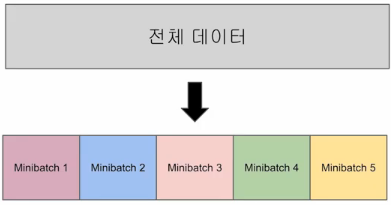  
- 에포크(Epoch) : 전체 훈련 데이터가 학습에 한번 사용된 주기
- 배치 크기(batch size)
    - 미니 배치의 개수만큼 경사하강법을 수행해야 전체 데이터가 한 번 전부 사용됨
    - 미니 배치의 개수는 결국 미니 배치의 크기를 몇으로 하느냐에 따라 달라짐
    - 전체 데이터에 대해 한번에 경사 하강법을 수행하는 방법 : 배치 경사 하강법
        - 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 안정적
    - 미니 배치 단위로 경사 하강법을 수행하는 방법 : 미니 배치 경사 하강법
        - 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 조금 헤매기도 하지만 훈련 속도가 빠름
- 배치 크기는 보통 2의 제곱수를 사용. 그 이유는 CPU와 GPU의 메모리가 2의 배수이므로

이터레이션  
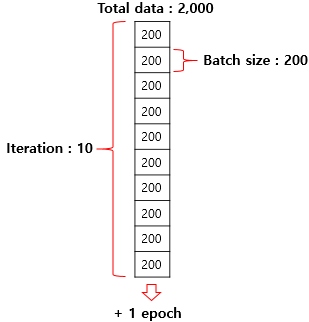  
한번의 에포크 내에서 이뤄지는 가중치 W와 b의 업데이트 횟수

In [22]:
import torch
import torch.nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [23]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

dataset = TensorDataset(x_train, y_train)

In [24]:
# shuffle=True를 선택하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿉니다.
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [25]:
model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [26]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()))

Epoch    0/20 Batch 1/3 Cost: 26838.554688
Epoch    0/20 Batch 2/3 Cost: 4949.356934
Epoch    0/20 Batch 3/3 Cost: 1217.417969
Epoch    1/20 Batch 1/3 Cost: 874.722717
Epoch    1/20 Batch 2/3 Cost: 256.657043
Epoch    1/20 Batch 3/3 Cost: 24.682867
Epoch    2/20 Batch 1/3 Cost: 45.678944
Epoch    2/20 Batch 2/3 Cost: 5.590558
Epoch    2/20 Batch 3/3 Cost: 27.639778
Epoch    3/20 Batch 1/3 Cost: 8.685300
Epoch    3/20 Batch 2/3 Cost: 3.939066
Epoch    3/20 Batch 3/3 Cost: 2.802620
Epoch    4/20 Batch 1/3 Cost: 6.150103
Epoch    4/20 Batch 2/3 Cost: 7.124768
Epoch    4/20 Batch 3/3 Cost: 2.149211
Epoch    5/20 Batch 1/3 Cost: 1.789171
Epoch    5/20 Batch 2/3 Cost: 15.624266
Epoch    5/20 Batch 3/3 Cost: 3.540388
Epoch    6/20 Batch 1/3 Cost: 5.700332
Epoch    6/20 Batch 2/3 Cost: 6.880760
Epoch    6/20 Batch 3/3 Cost: 2.429880
Epoch    7/20 Batch 1/3 Cost: 7.628876
Epoch    7/20 Batch 2/3 Cost: 3.857748
Epoch    7/20 Batch 3/3 Cost: 5.840155
Epoch    8/20 Batch 1/3 Cost: 5.205458
Epoch  

In [27]:
new_var = torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print('훈련 후 입력이 73, 80, 75일 때 예측:', pred_y)

훈련 후 입력이 73, 80, 75일 때 예측: tensor([[153.5408]], grad_fn=<AddmmBackward0>)


커스텀 데이터셋(Custom Dataset)

In [28]:
# 커스텀 데이터 셋 뼈대
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        """데이터 셋의 전처리를 해주는 부분"""
    def __len__(self):
        """데이터 셋의 길이. 총 샘플의 수
           len(dataset)을 했을 때 데이터셋의 크기를 리턴
        """
    def __getitem__(self, idx):
        """데이터 셋에서 특정 1개의 샘플을 가져오는 부분
           dataset[i]을 했을 때 i번째 샘플을 가져오도록 하는 인덱싱
        """

In [29]:
# 커스텀 데이터셋으로 선형 회귀 구현
import torch
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset 상속
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    
    def __len__(self):
        """총 데이터의 개수 리턴"""
        return len(self.x_data)

    def __getitem__(self, idx):
        """인덱스를 입력받아 맵핑되는 입출력 데이터를 파이토치의 텐서 형태로 리턴"""
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = torch.nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()))

Epoch    0/20 Batch 1/3 Cost: 54524.218750
Epoch    0/20 Batch 2/3 Cost: 8945.384766
Epoch    0/20 Batch 3/3 Cost: 2403.548828
Epoch    1/20 Batch 1/3 Cost: 1564.037354
Epoch    1/20 Batch 2/3 Cost: 550.309875
Epoch    1/20 Batch 3/3 Cost: 128.874252
Epoch    2/20 Batch 1/3 Cost: 35.747013
Epoch    2/20 Batch 2/3 Cost: 24.368717
Epoch    2/20 Batch 3/3 Cost: 13.028359
Epoch    3/20 Batch 1/3 Cost: 0.577794
Epoch    3/20 Batch 2/3 Cost: 5.028281
Epoch    3/20 Batch 3/3 Cost: 1.949444
Epoch    4/20 Batch 1/3 Cost: 2.790054
Epoch    4/20 Batch 2/3 Cost: 4.539859
Epoch    4/20 Batch 3/3 Cost: 1.471622
Epoch    5/20 Batch 1/3 Cost: 0.735318
Epoch    5/20 Batch 2/3 Cost: 2.351956
Epoch    5/20 Batch 3/3 Cost: 7.989922
Epoch    6/20 Batch 1/3 Cost: 2.292079
Epoch    6/20 Batch 2/3 Cost: 3.429396
Epoch    6/20 Batch 3/3 Cost: 0.660007
Epoch    7/20 Batch 1/3 Cost: 1.045065
Epoch    7/20 Batch 2/3 Cost: 4.478187
Epoch    7/20 Batch 3/3 Cost: 0.089189
Epoch    8/20 Batch 1/3 Cost: 0.152518
Epoch

In [30]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.1972]], grad_fn=<AddmmBackward0>)
